# Kütüphaneleri Yükleme

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Veri Dosyasını Okutma

In [4]:
# Aşağıda bulunan 2 satırlık kodu "#" işaretlerini silerek çalıştırabilirsiniz.
# Eğer kodlar çalışmaz ise pd.read_csv fonksiyonu içerisine encoding= "windows-1252" argümanını yazmalısınız.

# df = pd.read_csv("PoliceKillingsUS.csv")
# df.head()

In [6]:
df = pd.read_csv("PoliceKillingsUS.csv", encoding= "windows-1252")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [8]:
# Veri seti ile ilgili özet bilgilere bakalım!

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [10]:
# Veri setinin boyutunu bulma
# shape fonksiyonu bize veri setinde bulunan toplam satır ve sütun sayısını verir.
# Output --> (toplam_satır_sayısı , toplam_sütun_sayısı)

df.shape

(2535, 14)

# Grafik Oluşturma

## Her İki Cinsiyet İçin Yaşların "manner of death" Sütununa Göre Gruplandırılarak Gösterildiği Kutu Grafiği

In [15]:
# manner_of_death sütunundaki unique (eşsiz) değerleri bulma.

df.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**Not: Her iki cinsiyette de manner_of_death sütununa göre ayrılmış çeyrek yaş dilimlerini gösterin.**

In [18]:
df.dropna(inplace=True)

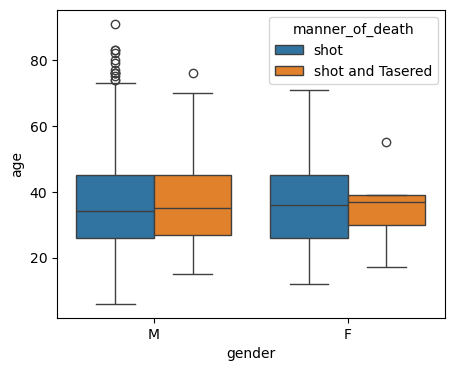

In [20]:
plt.figure(figsize = (5, 4))

sns.boxplot(data = df, x = "gender", y = "age", hue = "manner_of_death")

plt.show()

## Swarm Plot

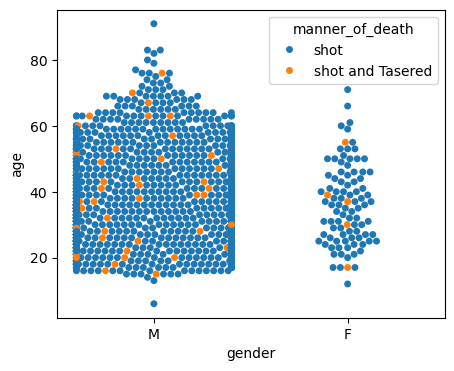

In [37]:
plt.figure(figsize = (5, 4))

sns.swarmplot(df, x = "gender", y = "age", hue = "manner_of_death")

plt.show()

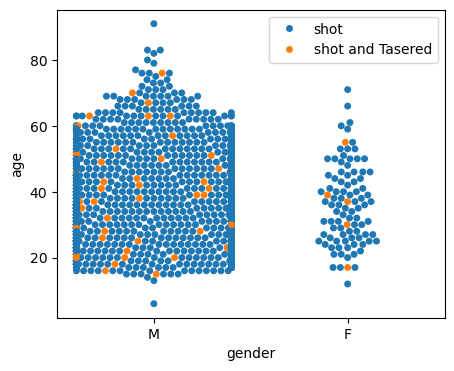

In [22]:
plt.figure(figsize = (5, 4))

sns.swarmplot(df, x = "gender", y = "age", hue = "manner_of_death")

# Göstergenin konumunu "loc" argümanını kullanarak düzenleyebilirsiniz. 
plt.legend(loc = "upper right")

plt.show()

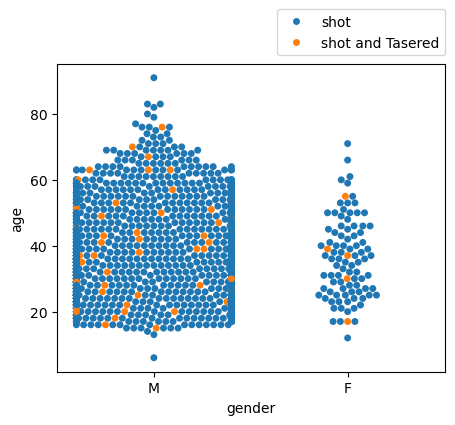

In [55]:
plt.figure(figsize = (5, 4))

sns.swarmplot(df, x = "gender", y = "age", hue = "manner_of_death")

# You can also arrange the location of legend by using "bbox_to_anchor" argument. 
plt.legend(bbox_to_anchor=(1.02, 1.2))

plt.show()

## En Tehlikeli 12 Şehrin Grafiklendirilmesi

In [24]:
# En tehlikeli 12 şehri groupby fonksiyonu kullanarak bulma.

most_dangerous_cities = df.groupby("city")["city"].count().sort_values(ascending= False).head(12)
most_dangerous_cities

city
Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
San Antonio      15
Miami            15
St. Louis        14
Indianapolis     14
Oklahoma City    13
Name: city, dtype: int64

In [27]:
# şehir isimlerinin tanımlanması

city_names = most_dangerous_cities.index
city_names

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'San Antonio', 'Miami', 'St. Louis', 'Indianapolis',
       'Oklahoma City'],
      dtype='object', name='city')

In [29]:
# şehir değerlerinin (sayılarının) tanımlanması

city_values = most_dangerous_cities.values
city_values

array([35, 28, 24, 22, 18, 17, 16, 15, 15, 14, 14, 13], dtype=int64)

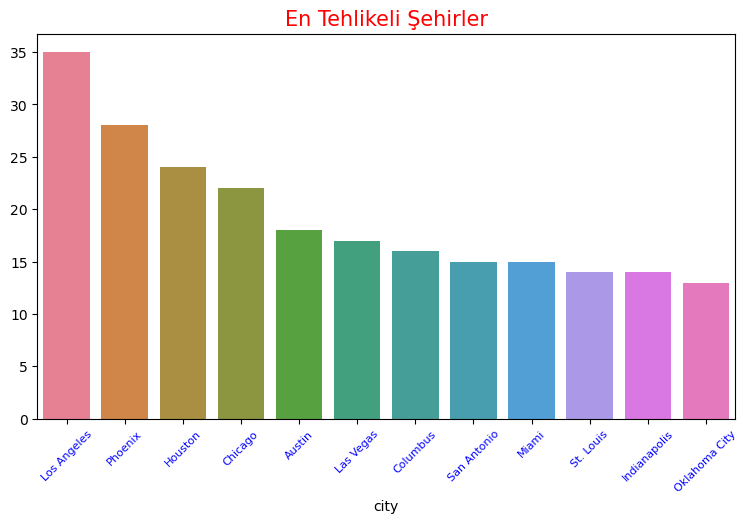

In [31]:
# Seaborn barplot ile grafik çizimi

fig, ax = plt.subplots(figsize = (9, 5))

ax = sns.barplot(x = city_names, y = city_values, legend= True, palette= "husl")
ax.set_title("En Tehlikeli Şehirler", color = "red", size = 15)

plt.xticks(rotation = 45, color = "blue", size = 8)

plt.show()

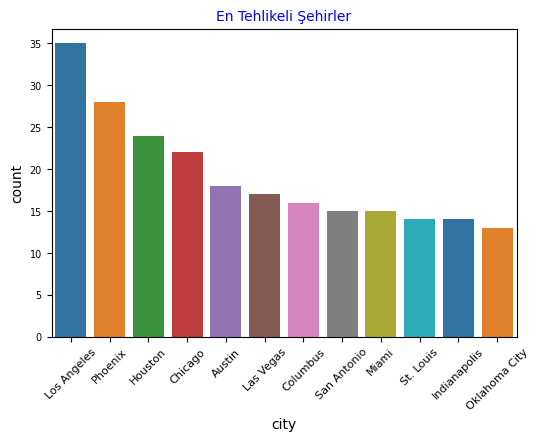

In [33]:
# Seaborn countplot ile grafik çizimi

fig, ax = plt.subplots(figsize = (6, 4))

ax = sns.countplot(data = df, x = "city", order = most_dangerous_cities.index, legend= True, palette= "tab10")
ax.set_title("En Tehlikeli Şehirler", color = "blue", size = 10)

plt.xticks(rotation = 45, color = "black", size = 8)
plt.yticks(size = 7)

plt.show()

## En Tehlikeli 20 Eyaletin Grafiklendirilmesi

In [37]:
# "value_counts" kullanarak en tehlikeli 20 eyaletin bulunması.

df["state"].value_counts(ascending = False).head(20)

state
CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
Name: count, dtype: int64

In [43]:
# eyalet isimlerinin tanımlanması

state_names = df["state"].value_counts(ascending = False).head(20).index
state_names

Index(['CA', 'TX', 'FL', 'AZ', 'OH', 'NC', 'OK', 'CO', 'GA', 'MO', 'TN', 'IL',
       'WA', 'LA', 'AL', 'PA', 'NY', 'VA', 'WI', 'NM'],
      dtype='object', name='state')

In [45]:
# eyalet değerlerinin tanımlanması

state_values = df["state"].value_counts(ascending = False).head(20).values
state_values

array([366, 200, 136, 105,  70,  66,  65,  63,  61,  58,  56,  56,  51,
        47,  45,  45,  43,  43,  42,  41], dtype=int64)

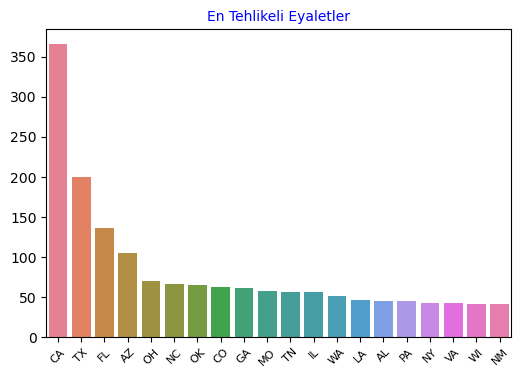

In [47]:
# Seaborn barplot ile grafik çizimi

fig, ax = plt.subplots(figsize = (6, 4))

ax = sns.barplot(x = state_names, y = state_values, legend= True, palette= "husl")
ax.set_title("En Tehlikeli Eyaletler", color = "blue", size = 10)

plt.xticks(rotation = 45, color = "black", size = 8)
plt.xlabel(xlabel= "")

plt.show()

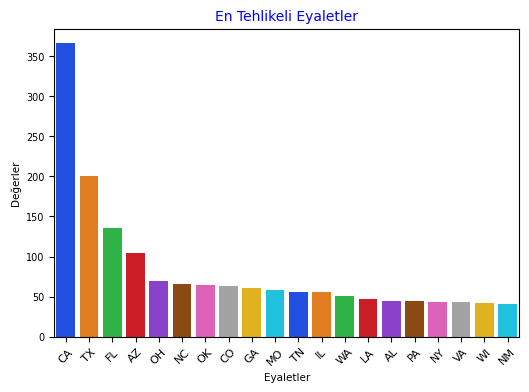

In [49]:
# Seaborn countplot ile grafik çizimi

fig, ax = plt.subplots(figsize = (6, 4))

ax = sns.countplot(data = df, x = "state", order = state_names, legend= True, palette= "bright")
ax.set_title("En Tehlikeli Eyaletler", color = "blue", size = 10)

plt.xticks(rotation = 45, color = "black", size = 8)
plt.yticks(size = 7)
plt.xlabel(xlabel= "Eyaletler", size = 7.5)
plt.ylabel(ylabel= "Değerler", size = 7.5)

plt.show()

## Öldürülen İnsanların Zihinsel Hastalığa Sahip Olup Olmadıklarının Grafiklendirilmesi

In [52]:
df[(df["signs_of_mental_illness"] == True) | (df["signs_of_mental_illness"] == False)].head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [54]:
# Zihinsel gastalığı olup olmayan insanların sayılarının bulunması

df["signs_of_mental_illness"].value_counts()

signs_of_mental_illness
False    1681
True      573
Name: count, dtype: int64

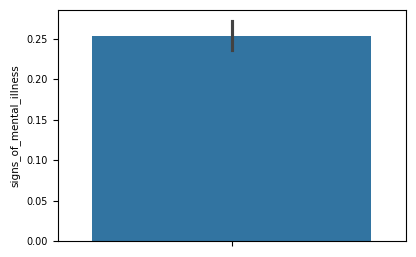

In [56]:
# Seaborn barplot ile grafik çizimi

plt.figure(figsize = (4.5, 3))

sns.barplot(data = df, y = "signs_of_mental_illness")
plt.yticks(size = 7)
plt.ylabel(ylabel= "signs_of_mental_illness", size = 7.5)

plt.show()

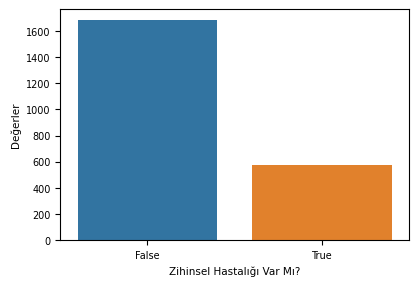

In [58]:
# Seaborn countplot ile grafik çizimi

plt.figure(figsize = (4.5, 3))

sns.countplot(data = df, x = "signs_of_mental_illness", palette = "tab10")

plt.xticks(size = 7)
plt.yticks(np.arange(0, 1650, 200), size = 7)

plt.xlabel(xlabel = "Zihinsel Hastalığı Var Mı?", size = 7.5)
plt.ylabel(ylabel= "Değerler", size = 7.5)

plt.show()

## Tehdit Türlerinin Sayısına Göre Grafik Çizilmesi

In [61]:
df["threat_level"].value_counts()

threat_level
attack          1462
other            677
undetermined     115
Name: count, dtype: int64

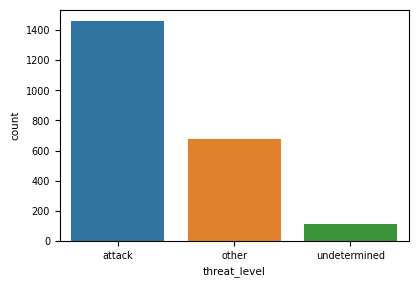

In [63]:
# Seaborn barplot ile grafik çizimi

plt.figure(figsize = (4.5, 3))

sns.countplot(data = df, x = "threat_level", palette = "tab10")

plt.xticks(size = 7)
plt.yticks(np.arange(0, 1450, 200), size = 7)

plt.xlabel(xlabel = "threat_level", size = 7.6)
plt.ylabel(ylabel= "count", size = 7.5)

plt.show()

## Kaçış Türlerinin Sayısına Göre Grafik Çizilmesi

In [66]:
df["flee"].value_counts()

flee
Not fleeing    1528
Car             360
Foot            278
Other            88
Name: count, dtype: int64

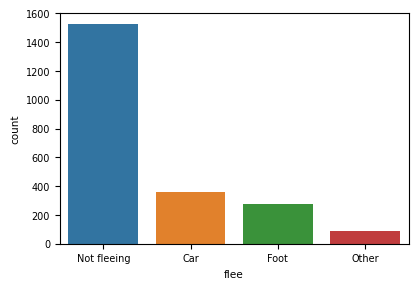

In [68]:
# Seaborn countplot ile grafik çizimi

plt.figure(figsize = (4.5, 3))

sns.countplot(data = df, x = "flee", palette = "tab10")

plt.xticks(size = 7)
plt.yticks(np.arange(0, 1650, 200), size = 7)

plt.xlabel(xlabel = "flee", size = 7.6)
plt.ylabel(ylabel= "count", size = 7.5)

plt.show()